<a href="https://colab.research.google.com/github/Govindu-Sathruwan/DSPL-Tutorial-7/blob/main/DSPL_Week_7_Tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GitHub Repo: https://github.com/Govindu-Sathruwan/DSPL-Tutorial-7**

# Task 1

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data in the CSV file
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Task 2

In [ ]:
# median blood pressure of patients with diabetes
data[data['Outcome'] == 1]['BloodPressure'].median()

74.0

# Task 3

The outcome feature is the variable that determines if the patient tested positive or nagative for diabetes.

In [ ]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Based on this it can be said that the data set is not balanced as there are about double the number of negatively tested people compared to positively tested.

# Task 4

In [ ]:
x = data[[ 'Age', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies', 'Glucose']]
y = data['Outcome']

In [ ]:
x

,Age,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Glucose
0,50,72,35,0,33.6,0.627,6,148
1,31,66,29,0,26.6,0.351,1,85
2,32,64,0,0,23.3,0.672,8,183
3,21,66,23,94,28.1,0.167,1,89
4,33,40,35,168,43.1,2.288,0,137
...,...,...,...,...,...,...,...,...
763,63,76,48,180,32.9,0.171,10,101
764,27,70,27,0,36.8,0.340,2,122
765,30,72,23,112,26.2,0.245,5,121
766,47,60,0,0,30.1,0.349,1,126


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# Task 5

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

The startify = y code makes sure that the classes in y, which is 0 and 1 i this case retain the same proportions when spilt into test and train as well. This is important when the data set is not balanced.

# Task 6

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Task 7

In [ ]:
# decision tree clasifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.7135416666666666

This model shows an accuracy score of 74% which is relatively a good value but with a lot of room for improvement. This means that this model can predict the chance of patient being diabities or not with a 74% accuracy based on the other features. But when it comes to something like health and well being of a person 74% is too low to be considered reliable.

# Task 8

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
y_train_pred = dt.predict(x_train)
accuracy_score(y_train, y_train_pred)

1.0

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
y_test_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.7135416666666666

Since predicting with train data itself showed that the model shows an 100% accuracy while predicting with the new test data only gave a 74% accuracy, it is possible to assume that there is some overfitting in this model.

# Task 9

Precision is a ratio of the correctly predicted positives to the total predicted positives. It answers the question "out of the predicted positives, how many are actually positive?". High precision = lower false positives.

Recall is a ratio of the correctly predicted positives to all the actual positives. It answers the question "out of all the actual positives, how many did we predict correct?". High recall = lower false negatives.

# Task 10

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[100,  25],
       [ 30,  37]])

Since true negatives (105) and true positives (37) are higher than the false positives (20) and false negatives (30), we can say that this model is sensitive to the predicting cases of diabetes.

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       125
           1       0.60      0.55      0.57        67

    accuracy                           0.71       192
   macro avg       0.68      0.68      0.68       192
weighted avg       0.71      0.71      0.71       192



with recall of 0.55 this model has a 55% sensitvity to predict diabeyes cases. However this too low for a medical case to be considered reliable as we are dealing with people lives and health.

# Task 11

In [ ]:
from sklearn import tree
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=1500)
tree.plot_tree(dt)
plt.show()

# Task 12

Decision tress split features with the more important features to the prediction at top, so by following each layer of the decision tree we can determin which feature is more significant for the prediction.

the above plot shows feature 7 at the highest split followed by 4, 0, 5, 1, 3, 6 and 2. These indexes follow the order in which the features in the x train data was arranged.

Glucose: 0.3527
BMI: 0.1659
Age: 0.1235
DiabetesPedigreeFunction: 0.1206
BloodPressure: 0.0886
Pregnancies: 0.0648
Insulin: 0.0615
SkinThickness: 0.0224


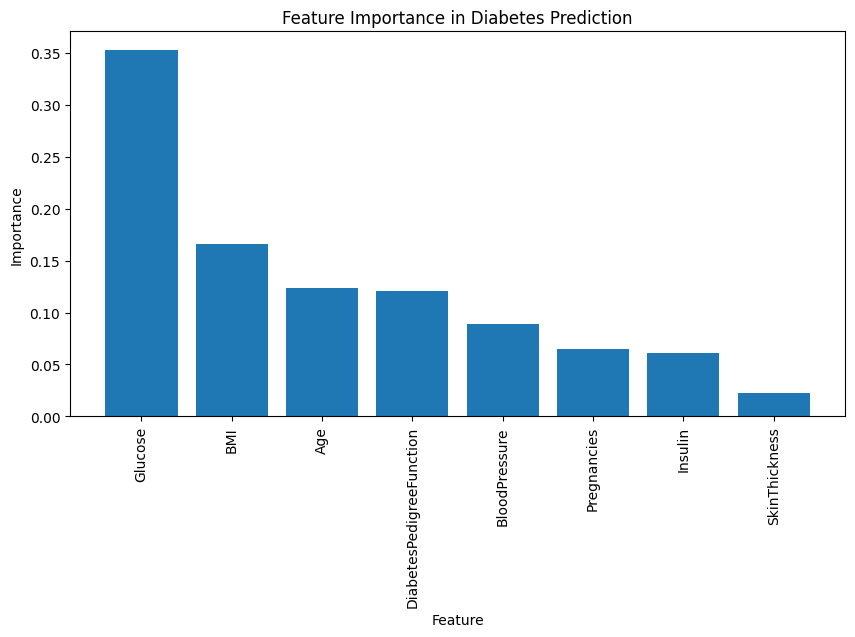

In [ ]:
# Get feature importance
importance = dt.feature_importances_

# Rank features
feature_names = x_train.columns
sorted_indices = np.argsort(importance)[::-1]

# Print ranked features
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importance[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), importance[sorted_indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Diabetes Prediction")
plt.show()

# Task 13

In [ ]:
# K Neighbours clasifire with 4 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# confusion matrix
y_pred_knn = knn.predict(x_test)
confusion_matrix(y_test, y_pred_knn)

array([[114,  11],
       [ 41,  26]])

In [ ]:
# classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81       125
           1       0.70      0.39      0.50        67

    accuracy                           0.73       192
   macro avg       0.72      0.65      0.66       192
weighted avg       0.72      0.73      0.70       192



The decision tree model shows slighlty higher accuracy as well as percision and recall for predicting patients positive for diabetes. Therefore, it is the slightly better model.

# Task 14

In [ ]:
WSdata = pd.read_csv('pm25_2016_2020.csv')
WSdata.head()

,Unnamed: 0,date_local,latitude_x,longitude_x,elevation,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,arithmetic_mean_a,arithmetic_mean_b
0,0,6/15/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,9.2
1,1,6/18/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,3.9
2,2,6/21/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,6.7
3,3,6/24/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,5.7
4,4,6/30/2017,39.024265,-95.711275,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.4


latitude_x and longitude_x would be the two feature most relavant for geaographical distribution.

# Task 15

In [ ]:
X = WSdata[['latitude_x', 'longitude_x']]
X

,latitude_x,longitude_x
0,39.024265,-95.711275
1,39.024265,-95.711275
2,39.024265,-95.711275
3,39.024265,-95.711275
4,39.024265,-95.711275
...,...,...
99995,42.978248,-112.455813
99996,42.978248,-112.455813
99997,42.978248,-112.455813
99998,42.978248,-112.455813


# Task 16

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
X["Clusters"] = kmeans.fit_predict(X)
X["Clusters"] = X["Clusters"].astype("category")
X

<ipython-input-48-aa5777fbf358>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Clusters"] = kmeans.fit_predict(X)
<ipython-input-48-aa5777fbf358>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Clusters"] = X["Clusters"].astype("category")


,latitude_x,longitude_x,Clusters
0,39.024265,-95.711275,2
1,39.024265,-95.711275,2
2,39.024265,-95.711275,2
3,39.024265,-95.711275,2
4,39.024265,-95.711275,2
...,...,...,...
99995,42.978248,-112.455813,3
99996,42.978248,-112.455813,3
99997,42.978248,-112.455813,3
99998,42.978248,-112.455813,3


This code makes a kmeans classification model wich classfies the latitude and longitude to differenc clsuters based on their means. We can expect clusters from 0 - 5 since we asked the model to compute for 6 clusters.

# Task 17

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
X["Clusters"] = kmeans.fit_predict(X)
X["Clusters"] = X["Clusters"].astype("category")
X

<ipython-input-49-56dbc47eeaeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Clusters"] = kmeans.fit_predict(X)
<ipython-input-49-56dbc47eeaeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Clusters"] = X["Clusters"].astype("category")


,latitude_x,longitude_x,Clusters
0,39.024265,-95.711275,1
1,39.024265,-95.711275,1
2,39.024265,-95.711275,1
3,39.024265,-95.711275,1
4,39.024265,-95.711275,1
...,...,...,...
99995,42.978248,-112.455813,0
99996,42.978248,-112.455813,0
99997,42.978248,-112.455813,0
99998,42.978248,-112.455813,0


In [ ]:
X["Clusters"].value_counts()

,count
Clusters,
1,30548
2,27690
0,23752
3,15106
4,2904


# Task 18

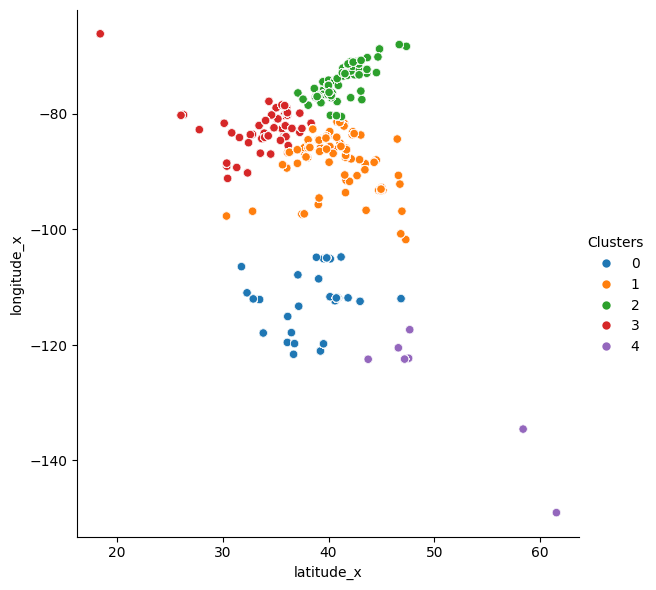

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.relplot(x="latitude_x", y="longitude_x", hue="Clusters", data=X, height=6)